**Com base nos respondentes da pesquisa *State of Data Brazil 2024-2025*, o objetivo desta análise é verificar como a satisfação profissional e a experiência com layoffs (diretos ou indiretos) impactam a decisão de procurar um novo emprego.**

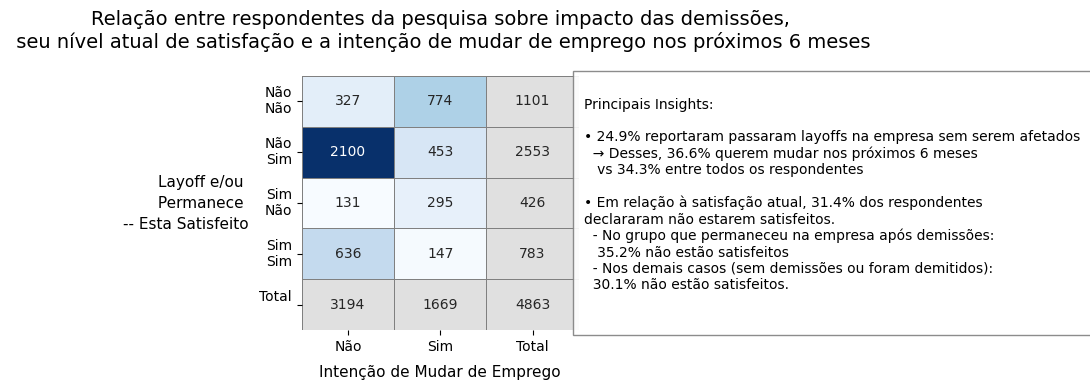

________________________________________________________________________________

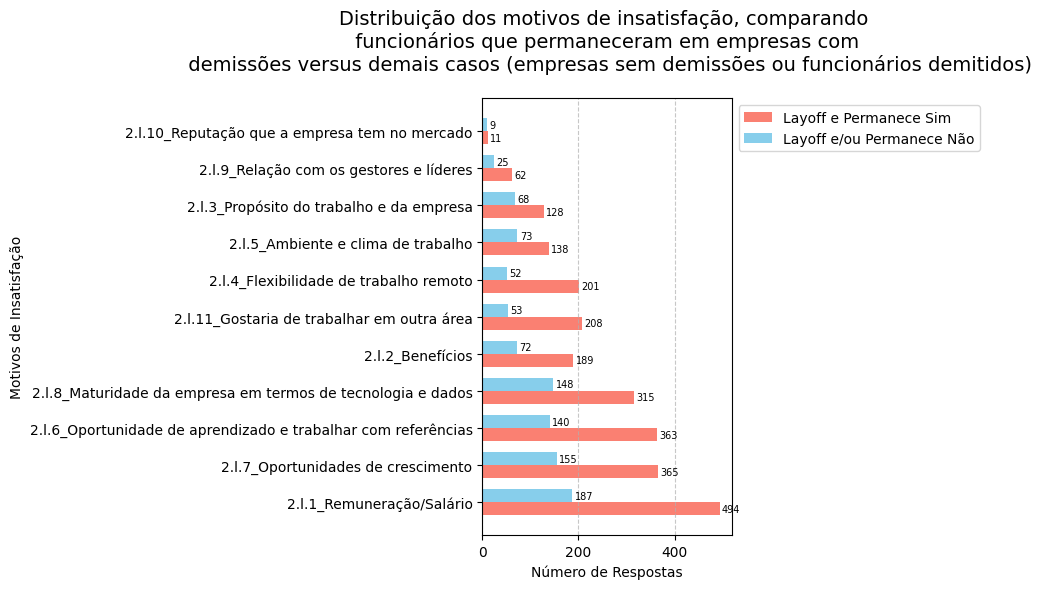

________________________________________________________________________________

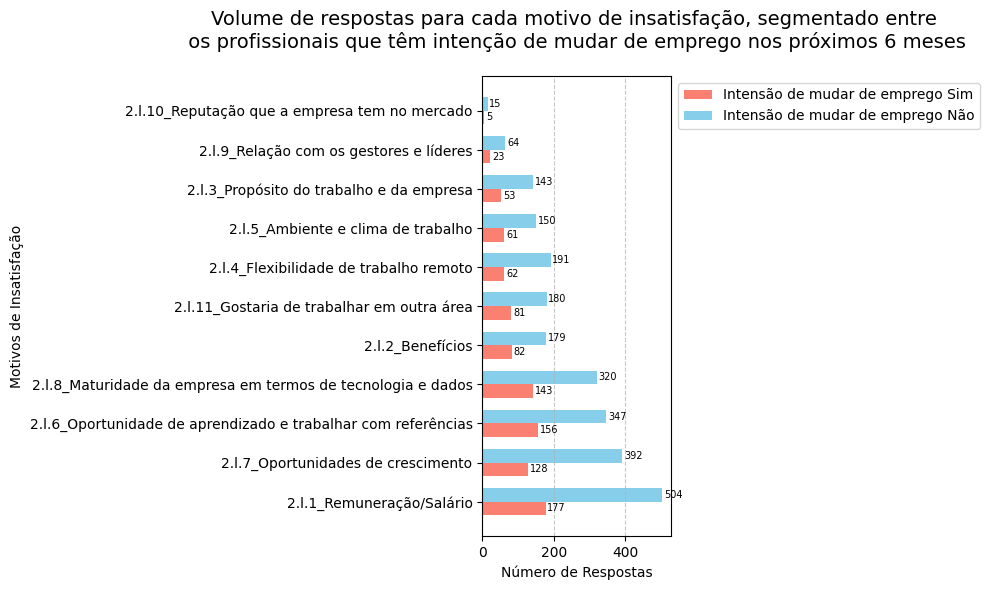

________________________________________________________________________________________________________________________________________________________________

Código

In [1]:
#importar libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display



In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("datahackers/state-of-data-brazil-20242025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/state-of-data-brazil-20242025


In [3]:
#criar data frame
df_24 = pd.read_csv("/kaggle/input/state-of-data-brazil-20242025/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")



**Criar nova tabela com principais variaveis.**

In [4]:
print(list(df_24.columns))

['0.a_token', '0.d_data/hora_envio', '1.a_idade', '1.a.1_faixa_idade', '1.b_genero', '1.c_cor/raca/etnia', '1.d_pcd', '1.e_experiencia_profissional_prejudicada', '1.e.1_Não acredito que minha experiência profissional seja afetada', '1.e.2_Sim, devido a minha Cor/Raça/Etnia', '1.e.3_Sim, devido a minha identidade de gênero', '1.e.4_Sim, devido ao fato de ser PCD', '1.i.1_uf_onde_mora', '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas', '1.f.2_Senioridade das vagas recebidas em relação à sua experiência', '1.f.3_Aprovação em processos seletivos/entrevistas', '1.f.4_Oportunidades de progressão de carreira', '1.f.5_Velocidade de progressão de carreira', '1.f.6_Nível de cobrança no trabalho/Stress no trabalho', '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias', '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho', '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho', '1.i.2_regiao_onde

In [5]:
novo_df = df_24[['1.a.1_faixa_idade','1.i_estado_onde_mora','1.l_nivel_de_ensino','2.a_situação_de_trabalho','2.b_setor',
'2.c_numero_de_funcionarios','2.f_cargo_atual','2.g_nivel','2.h_faixa_salarial','2.i_tempo_de_experiencia_em_dados',
'2.j_tempo_de_experiencia_em_ti','2.k_satisfeito_atualmente','2.l.1_Remuneração/Salário', '2.l.2_Benefícios', '2.l.3_Propósito do trabalho e da empresa',
'2.l.4_Flexibilidade de trabalho remoto', '2.l.5_Ambiente e clima de trabalho', '2.l.6_Oportunidade de aprendizado e trabalhar com referências',
'2.l.7_Oportunidades de crescimento', '2.l.8_Maturidade da empresa em termos de tecnologia e dados', '2.l.9_Relação com os gestores e líderes',
'2.l.10_Reputação que a empresa tem no mercado', '2.l.11_Gostaria de trabalhar em outra área', '2.l_motivo_insatisfacao',
'2.m_participou_de_entrevistas_ultimos_6m','2.n_planos_de_mudar_de_emprego_6m','4.a.1_atuacao_em_dados','5.a_objetivo_na_area_de_dados',
'2.q_empresa_passou_por_layoff_em_2024'

]]

In [6]:
novo_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,1.a.1_faixa_idade,1.i_estado_onde_mora,1.l_nivel_de_ensino,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,...,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,4.a.1_atuacao_em_dados,5.a_objetivo_na_area_de_dados,2.q_empresa_passou_por_layoff_em_2024
0,17-21,Rio Grande do Sul (RS),Estudante de Graduação,Estagiário,Marketing,de 101 a 500,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,...,NaN,NaN,NaN,NaN,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...",Análise de Dados,NaN,"Sim, ocorreram layoffs/demissões em massa na e..."
1,17-21,Santa Catarina (SC),Estudante de Graduação,Estagiário,Finanças ou Bancos,Acima de 3.000,Analista de BI/BI Analyst,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,...,NaN,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Análise de Dados,NaN,Não ocorreram layoffs/demissões em massa na em...
2,17-21,São Paulo (SP),Estudante de Graduação,Empregado (CLT),Indústria,de 501 a 1.000,Outra Opção,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,...,0.0,0.0,0.0,0.0,Remuneração/Salário não corresponde a realidad...,Não participei de entrevistas de emprego/proce...,Estou em busca de oportunidades dentro ou fora...,Outra atuação,NaN,Não ocorreram layoffs/demissões em massa na em...
3,17-21,São Paulo (SP),Estudante de Graduação,Estagiário,Tecnologia/Fábrica de Software,de 501 a 1.000,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,...,NaN,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Análise de Dados,NaN,Não ocorreram layoffs/demissões em massa na em...
4,17-21,São Paulo (SP),Estudante de Graduação,Estagiário,Tecnologia/Fábrica de Software,de 1.001 a 3.000,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,...,NaN,NaN,NaN,NaN,NaN,"Sim, fui aprovado mas decidi não mudar de emprego",Não estou buscando e não pretendo mudar de emp...,Outra atuação,NaN,Não ocorreram layoffs/demissões em massa na em...


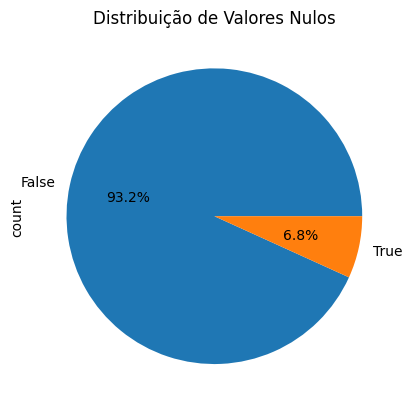

In [7]:
#Verificar se existem dados nulos na coluna 2.q_empresa_passou_por_layoff_em_2024
novo_df['2.q_empresa_passou_por_layoff_em_2024'].isna().value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Valores Nulos')
plt.show()

In [8]:
#Substituir nulo por Não Respondeu
novo_df['2.q_empresa_passou_por_layoff_em_2024'] = novo_df['2.q_empresa_passou_por_layoff_em_2024'].fillna('Não Respondeu')

/tmp/ipykernel_13/1465008740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df['2.q_empresa_passou_por_layoff_em_2024'] = novo_df['2.q_empresa_passou_por_layoff_em_2024'].fillna('Não Respondeu')


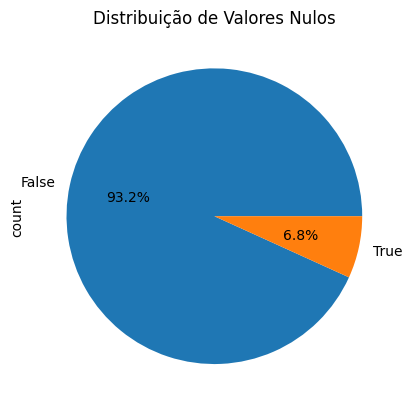

In [9]:
#Verificar se existem dados nulos na coluna 2.k_satisfeito_atualmente
novo_df['2.k_satisfeito_atualmente'].isna().value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Valores Nulos')
plt.show()

In [10]:
#Substituir nulo por Não Respondeu
novo_df['2.k_satisfeito_atualmente'] = novo_df['2.k_satisfeito_atualmente'].fillna('Não Respondeu')

/tmp/ipykernel_13/3901836069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df['2.k_satisfeito_atualmente'] = novo_df['2.k_satisfeito_atualmente'].fillna('Não Respondeu')


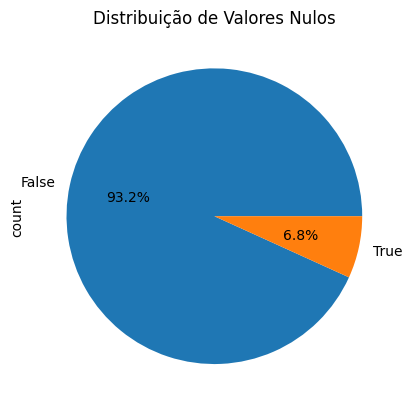

In [11]:
#Verificar se existem dados nulos na coluna 2.n_planos_de_mudar_de_emprego_6m
novo_df['2.n_planos_de_mudar_de_emprego_6m'].isna().value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Valores Nulos')
plt.show()

In [12]:
#Substituir nulo por Não Respondeu
novo_df['2.n_planos_de_mudar_de_emprego_6m'] = novo_df['2.n_planos_de_mudar_de_emprego_6m'].fillna('Não Respondeu')

/tmp/ipykernel_13/2906581250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df['2.n_planos_de_mudar_de_emprego_6m'] = novo_df['2.n_planos_de_mudar_de_emprego_6m'].fillna('Não Respondeu')


In [13]:
pd.crosstab(novo_df['2.n_planos_de_mudar_de_emprego_6m'], novo_df['2.k_satisfeito_atualmente'])

2.k_satisfeito_atualmente,False,True,Não Respondeu
2.n_planos_de_mudar_de_emprego_6m,,,
Estou em busca de oportunidades dentro ou fora do Brasil,905,348,0
"Estou em busca de oportunidades, mas apenas fora do Brasil",164,252,0
Não Respondeu,0,0,354
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,55,1242,0
"Não estou buscando, mas me considero aberto a outras oportunidades",403,1494,0


In [14]:
#criar mudar de emprego 6m
N_mudar = [ 'não estou buscando e não pretendo mudar de emprego',
            'não estou buscando, mas me considero aberto']

pattern = '|'.join(N_mudar)
novo_df['Mudar_Emprego'] = np.where(
    novo_df['2.n_planos_de_mudar_de_emprego_6m'].str.lower().str.contains(pattern, regex=True),
    'Não', 'Sim')

/tmp/ipykernel_13/1305154121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_df['Mudar_Emprego'] = np.where(


In [15]:
pd.crosstab(novo_df['Mudar_Emprego'], novo_df['2.k_satisfeito_atualmente'])

2.k_satisfeito_atualmente,False,True,Não Respondeu
Mudar_Emprego,,,
Não,458,2736,0
Sim,1069,600,354


#Devido quem esta marcado como 'Não Respondeu' se a empresa passou por layoff e esta satisfeito atualmente serem os mesmos, serão retirados esses casos

In [16]:
pd.crosstab(novo_df['2.q_empresa_passou_por_layoff_em_2024'], novo_df['2.k_satisfeito_atualmente'])

2.k_satisfeito_atualmente,False,True,Não Respondeu
2.q_empresa_passou_por_layoff_em_2024,,,
Não Respondeu,0,0,354
Não ocorreram layoffs/demissões em massa na empresa em que trabalho,1038,2432,0
"Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado",63,121,0
"Sim, ocorreram layoffs/demissões em massa na empresa em que trabalho mas não fui afetado",426,783,0


In [17]:
# nova tabela com filtro
df_filtrado = novo_df[novo_df['2.q_empresa_passou_por_layoff_em_2024'] != 'Não Respondeu'].copy()

**Quase 29% quem respondeu a pesquisa estavam em empresas que sofreram layoff em 2024. Na analise só vou considerar o público que a empresa teve layoff mas não foram impactados, para verificar se eles tem intenção de procurar outro emprego**

---



In [18]:
resultado = (df_filtrado['2.q_empresa_passou_por_layoff_em_2024']
             .value_counts(normalize=True)
             .mul(100)
             .round(2)
             .reset_index(name='Porcentagem'))

display(resultado.style.format({'Porcentagem': '{:.2f}%'}))

,2.q_empresa_passou_por_layoff_em_2024,Porcentagem
0,Não ocorreram layoffs/demissões em massa na empresa em que trabalho,71.36%
1,"Sim, ocorreram layoffs/demissões em massa na empresa em que trabalho mas não fui afetado",24.86%
2,"Sim, ocorreram layoffs/demissões em massa na empresa em que trabalhava e eu fui afetado",3.78%


In [19]:
#criar campo Demissao_N_Afetado, ocorreu demissão mas não afetado = Sim
df_filtrado = df_filtrado.assign(
    Demissao_N_Afetado =np.where(
        df_filtrado['2.q_empresa_passou_por_layoff_em_2024'].str.lower().str.contains('não fui afetado', na=False, regex=False),
        'Sim', 'Não'    ))

In [20]:
#criar campo Demissao_N_Afetado, ocorreu demissão mas não afetado = Sim
df_filtrado['Satisfeito_Atualmente'] = df_filtrado['2.k_satisfeito_atualmente'].map({ True: 'Sim',False: 'Não'})

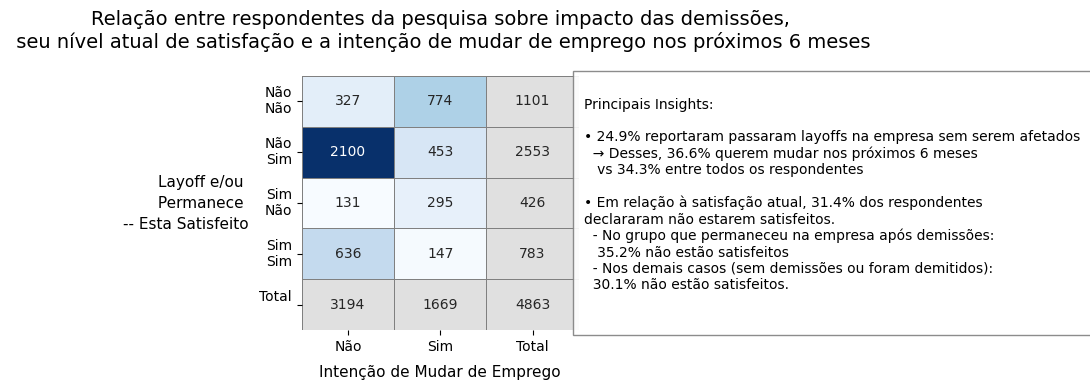

In [21]:
# Cálculos
dem_sim = (df_filtrado['Demissao_N_Afetado'] == 'Sim').mean() * 100
sim_mud = (df_filtrado['Mudar_Emprego'] == 'Sim').mean() * 100
sat = (df_filtrado['Satisfeito_Atualmente'] == 'Não').mean() * 100

demissao_sim = df_filtrado[df_filtrado['Demissao_N_Afetado'] == 'Sim']
demissao_nao = df_filtrado[df_filtrado['Demissao_N_Afetado'] == 'Não']

dem_sim_mud = (demissao_sim['Mudar_Emprego'] == 'Sim').mean() * 100
pec_insatisfeitos = (demissao_sim['Satisfeito_Atualmente'] == 'Não').mean() * 100
pec_insatisfeitos2 = (demissao_nao['Satisfeito_Atualmente'] == 'Não').mean() * 100

# Texto formatado para a caixa de análise
analise_texto = f"""
Principais Insights:

• {dem_sim:.1f}% reportaram passaram layoffs na empresa sem serem afetados
  → Desses, {dem_sim_mud:.1f}% querem mudar nos próximos 6 meses
   vs {sim_mud:.1f}% entre todos os respondentes

• Em relação à satisfação atual, {sat:.1f}% dos respondentes
declararam não estarem satisfeitos.
  - No grupo que permaneceu na empresa após demissões:
   {pec_insatisfeitos:.1f}% não estão satisfeitos
  - Nos demais casos (sem demissões ou foram demitidos):
  {pec_insatisfeitos2:.1f}% não estão satisfeitos.

"""

# 1. Criar tabela cruzada
cross_data = pd.crosstab(
    index=[df_filtrado['Demissao_N_Afetado'], df_filtrado['Satisfeito_Atualmente']],
    columns=df_filtrado['Mudar_Emprego'],
    margins=True,
    margins_name="Total"
)

# 2. Configurações de plotagem
plt.figure(figsize=(10, 4))
mask = np.zeros_like(cross_data, dtype=bool)
mask[-1, :] = True
mask[:, -1] = True

# 3. Heatmap principal
ax = sns.heatmap(
    cross_data,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    linecolor='gray',
    mask=mask,
    cbar=False
)

# 4. Heatmap para totais
sns.heatmap(
    cross_data,
    annot=True,
    fmt='d',
    cmap=['#e0e0e0'],
    linewidths=0.5,
    linecolor='gray',
    mask=~mask,
    cbar=False,
    ax=ax
)

# 5. Formatar
y_labels = [f"{d}\n{s}" if (d,s) != ('Total','Total') else 'Total'
           for d, s in cross_data.index]
ax.set_yticklabels(y_labels, rotation=0, ha='right')

# 6. gráfico
plt.title('Relação entre respondentes da pesquisa sobre impacto das demissões,\n seu nível atual de satisfação e a intenção de mudar de emprego nos próximos 6 meses', fontsize=14, pad=20)
plt.xlabel('Intenção de Mudar de Emprego', fontsize=11, labelpad=8)
plt.ylabel('Layoff e/ou \n Permanece \n-- Esta Satisfeito', fontsize=11,labelpad=8,rotation=0,  ha='right', va='center',linespacing=1.5)

# 7. análise texto
plt.text(    x=1.02,    y=0.5,    s=analise_texto,    transform=ax.transAxes,    fontsize=10,
    ha='left',    va='center',    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', pad=8))


plt.subplots_adjust(left=0.01)
plt.tight_layout()
plt.show()

In [22]:
novo_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,1.a.1_faixa_idade,1.i_estado_onde_mora,1.l_nivel_de_ensino,2.a_situação_de_trabalho,2.b_setor,2.c_numero_de_funcionarios,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,...,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área,2.l_motivo_insatisfacao,2.m_participou_de_entrevistas_ultimos_6m,2.n_planos_de_mudar_de_emprego_6m,4.a.1_atuacao_em_dados,5.a_objetivo_na_area_de_dados,2.q_empresa_passou_por_layoff_em_2024,Mudar_Emprego
0,17-21,Rio Grande do Sul (RS),Estudante de Graduação,Estagiário,Marketing,de 101 a 500,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,...,NaN,NaN,NaN,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...",Análise de Dados,NaN,"Sim, ocorreram layoffs/demissões em massa na e...",Não
1,17-21,Santa Catarina (SC),Estudante de Graduação,Estagiário,Finanças ou Bancos,Acima de 3.000,Analista de BI/BI Analyst,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,...,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Análise de Dados,NaN,Não ocorreram layoffs/demissões em massa na em...,Não
2,17-21,São Paulo (SP),Estudante de Graduação,Empregado (CLT),Indústria,de 501 a 1.000,Outra Opção,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,...,0.0,0.0,0.0,Remuneração/Salário não corresponde a realidad...,Não participei de entrevistas de emprego/proce...,Estou em busca de oportunidades dentro ou fora...,Outra atuação,NaN,Não ocorreram layoffs/demissões em massa na em...,Sim
3,17-21,São Paulo (SP),Estudante de Graduação,Estagiário,Tecnologia/Fábrica de Software,de 501 a 1.000,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,...,NaN,NaN,NaN,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Análise de Dados,NaN,Não ocorreram layoffs/demissões em massa na em...,Não
4,17-21,São Paulo (SP),Estudante de Graduação,Estagiário,Tecnologia/Fábrica de Software,de 1.001 a 3.000,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,...,NaN,NaN,NaN,NaN,"Sim, fui aprovado mas decidi não mudar de emprego",Não estou buscando e não pretendo mudar de emp...,Outra atuação,NaN,Não ocorreram layoffs/demissões em massa na em...,Não


In [23]:
#só quem respondeu que esta insatisfeito o motivo
df_satisfeitos = df_filtrado[df_filtrado['Satisfeito_Atualmente'] == 'Não']
grafico = df_satisfeitos[['Demissao_N_Afetado', 'Mudar_Emprego','2.l.1_Remuneração/Salário', '2.l.2_Benefícios', '2.l.3_Propósito do trabalho e da empresa',
'2.l.4_Flexibilidade de trabalho remoto', '2.l.5_Ambiente e clima de trabalho', '2.l.6_Oportunidade de aprendizado e trabalhar com referências',
'2.l.7_Oportunidades de crescimento', '2.l.8_Maturidade da empresa em termos de tecnologia e dados', '2.l.9_Relação com os gestores e líderes',
'2.l.10_Reputação que a empresa tem no mercado', '2.l.11_Gostaria de trabalhar em outra área']]

grafico.head()

,Demissao_N_Afetado,Mudar_Emprego,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área
2,Não,Sim,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Não,Sim,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Não,Não,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,Não,Não,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,Não,Sim,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# 1. Selecionar as colunas relevantes
cols_analise = [
    'Demissao_N_Afetado',
    'Mudar_Emprego',
    '2.l.1_Remuneração/Salário',
    '2.l.2_Benefícios',
    '2.l.3_Propósito do trabalho e da empresa',
    '2.l.4_Flexibilidade de trabalho remoto',
    '2.l.5_Ambiente e clima de trabalho',
    '2.l.6_Oportunidade de aprendizado e trabalhar com referências',
    '2.l.7_Oportunidades de crescimento',
    '2.l.8_Maturidade da empresa em termos de tecnologia e dados',
    '2.l.9_Relação com os gestores e líderes',
    '2.l.10_Reputação que a empresa tem no mercado',
    '2.l.11_Gostaria de trabalhar em outra área'
]

# 2. Criar tabela agrupada com soma
tabela_agregada = grafico[cols_analise].groupby(
    ['Demissao_N_Afetado', 'Mudar_Emprego']
).sum().reset_index()
# 3. Melhorar a apresentação (opcional)
# Transformar valores booleanos em 1/0 para melhor legibilidade
for col in cols_analise[2:]:
    tabela_agregada[col] = tabela_agregada[col].astype(int)

# 4. Exibir a tabela resultante
print("Tabela Agregada de Motivos por Demissão e Intenção de Mudar:")
display(tabela_agregada)

Tabela Agregada de Motivos por Demissão e Intenção de Mudar:


,Demissao_N_Afetado,Mudar_Emprego,2.l.1_Remuneração/Salário,2.l.2_Benefícios,2.l.3_Propósito do trabalho e da empresa,2.l.4_Flexibilidade de trabalho remoto,2.l.5_Ambiente e clima de trabalho,2.l.6_Oportunidade de aprendizado e trabalhar com referências,2.l.7_Oportunidades de crescimento,2.l.8_Maturidade da empresa em termos de tecnologia e dados,2.l.9_Relação com os gestores e líderes,2.l.10_Reputação que a empresa tem no mercado,2.l.11_Gostaria de trabalhar em outra área
0,Não,Não,129,59,34,51,38,107,89,97,18,3,63
1,Não,Sim,365,130,94,150,100,256,276,218,44,8,145
2,Sim,Não,48,23,19,11,23,49,39,46,5,2,18
3,Sim,Sim,139,49,49,41,50,91,116,102,20,7,35


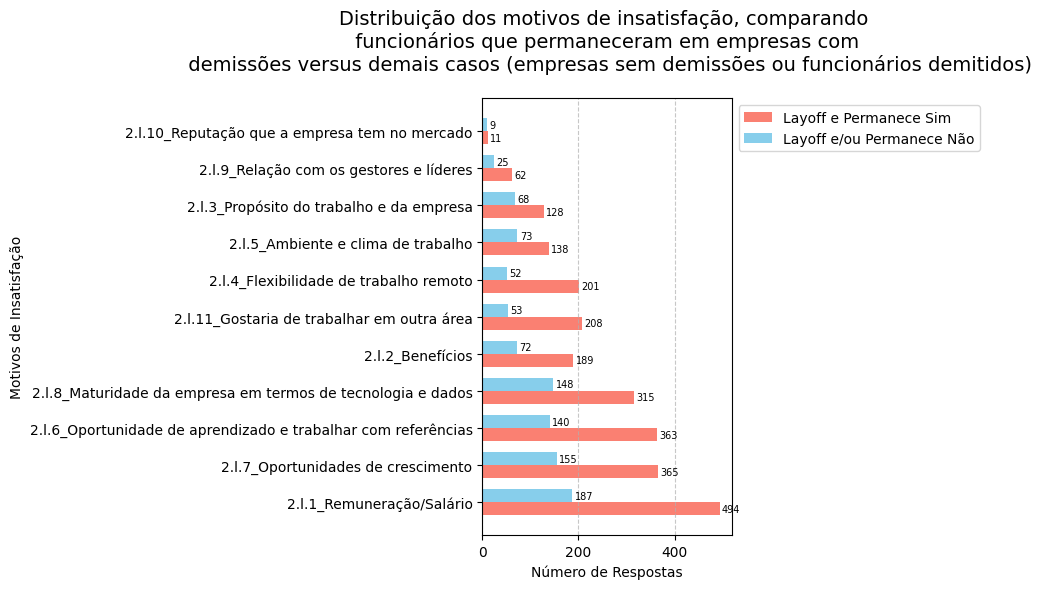

In [25]:
#grafico2
# 1. Preparar os dados
motivos = [
    '2.l.1_Remuneração/Salário',
    '2.l.2_Benefícios',
    '2.l.3_Propósito do trabalho e da empresa',
    '2.l.4_Flexibilidade de trabalho remoto',
    '2.l.5_Ambiente e clima de trabalho',
    '2.l.6_Oportunidade de aprendizado e trabalhar com referências',
    '2.l.7_Oportunidades de crescimento',
    '2.l.8_Maturidade da empresa em termos de tecnologia e dados',
    '2.l.9_Relação com os gestores e líderes',
    '2.l.10_Reputação que a empresa tem no mercado',
    '2.l.11_Gostaria de trabalhar em outra área'
]

# 2. Agregar os dados
df_plot = tabela_agregada.groupby('Demissao_N_Afetado')[motivos].sum().T.reset_index()
df_plot.columns = ['Motivo', 'Demissão_Sim', 'Demissão_Não']  # Assumindo que há apenas Sim/Não

# 3. Ordenar por maior frequência
df_plot['Total'] = df_plot['Demissão_Sim'] + df_plot['Demissão_Não']
df_plot = df_plot.sort_values('Total', ascending=False)

# 4. Criar o gráfico
plt.figure(figsize=(10, 6))

# Definir posições no eixo Y
y = np.arange(len(motivos))
bar_height = 0.35

# Barras para cada grupo
bars_sim = plt.barh(y - bar_height/2, df_plot['Demissão_Sim'],
                   height=bar_height, color='salmon', label='Layoff e Permanece Sim')
bars_nao = plt.barh(y + bar_height/2, df_plot['Demissão_Não'],
                   height=bar_height, color='skyblue', label='Layoff e/ou Permanece Não')

# Função para adicionar rótulos corrigida
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        offset = max(df_plot['Demissão_Sim'].max(), df_plot['Demissão_Não'].max()) * 0.01
        plt.text(width + offset,
                bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                va='center', ha='left', fontsize=7)

add_value_labels(bars_sim)
add_value_labels(bars_nao)

# Customizar o gráfico
plt.yticks(y, df_plot['Motivo'])
plt.title('Distribuição dos motivos de insatisfação, comparando \n funcionários que permaneceram em empresas com \n demissões versus demais casos (empresas sem demissões ou funcionários demitidos)', pad=20, fontsize=14)
plt.xlabel('Número de Respostas', fontsize=10)
plt.ylabel('Motivos de Insatisfação', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

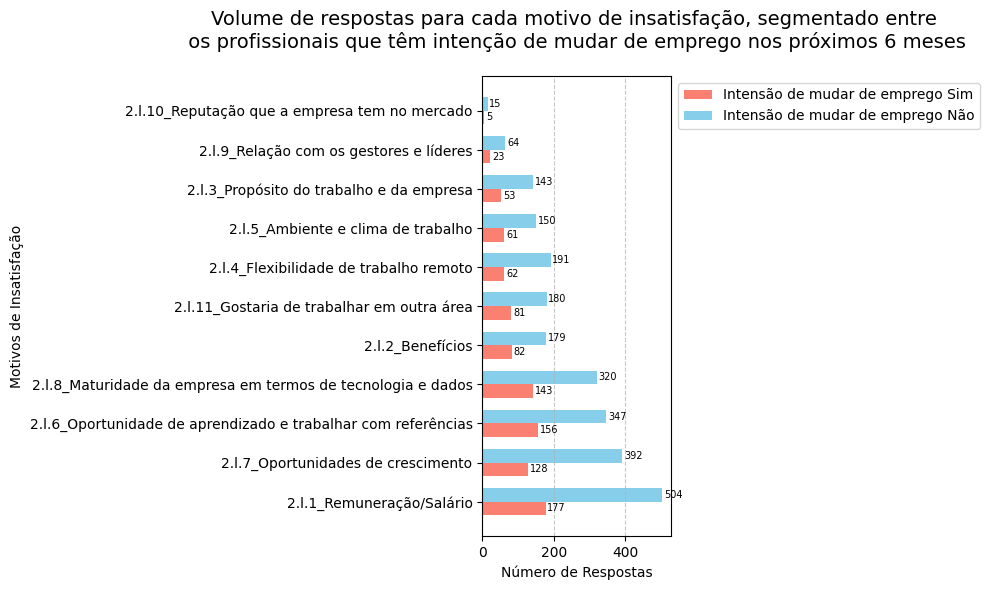

In [26]:
#grafico3
# 1. Preparar os dados
motivos = [
    '2.l.1_Remuneração/Salário',
    '2.l.2_Benefícios',
    '2.l.3_Propósito do trabalho e da empresa',
    '2.l.4_Flexibilidade de trabalho remoto',
    '2.l.5_Ambiente e clima de trabalho',
    '2.l.6_Oportunidade de aprendizado e trabalhar com referências',
    '2.l.7_Oportunidades de crescimento',
    '2.l.8_Maturidade da empresa em termos de tecnologia e dados',
    '2.l.9_Relação com os gestores e líderes',
    '2.l.10_Reputação que a empresa tem no mercado',
    '2.l.11_Gostaria de trabalhar em outra área'
]

# 2. Agregar os dados
df_plot = tabela_agregada.groupby('Mudar_Emprego')[motivos].sum().T.reset_index()
df_plot.columns = ['Motivo', 'Mudar_Sim', 'Mudar_Não']  # Assumindo que há apenas Sim/Não

# 3. Ordenar por maior frequência
df_plot['Total'] = df_plot['Mudar_Sim'] + df_plot['Mudar_Não']
df_plot = df_plot.sort_values('Total', ascending=False)

# 4. Criar o gráfico
plt.figure(figsize=(10, 6))

# Definir posições no eixo Y
y = np.arange(len(motivos))
bar_height = 0.35

# Barras para cada grupo
bars_sim = plt.barh(y - bar_height/2, df_plot['Mudar_Sim'],
                   height=bar_height, color='salmon', label='Intensão de mudar de emprego Sim')
bars_nao = plt.barh(y + bar_height/2, df_plot['Mudar_Não'],
                   height=bar_height, color='skyblue', label='Intensão de mudar de emprego Não')

# Função para adicionar rótulos corrigida
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        offset = max(df_plot['Mudar_Sim'].max(), df_plot['Mudar_Não'].max()) * 0.01
        plt.text(width + offset,
                bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                va='center', ha='left', fontsize=7)

add_value_labels(bars_sim)
add_value_labels(bars_nao)

# Customizar o gráfico
plt.yticks(y, df_plot['Motivo'])
plt.title('Volume de respostas para cada motivo de insatisfação, segmentado entre \n os profissionais que têm intenção de mudar de emprego nos próximos 6 meses ', pad=20, fontsize=14)
plt.xlabel('Número de Respostas', fontsize=10)
plt.ylabel('Motivos de Insatisfação', fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()